<a href="https://colab.research.google.com/github/areebahassan0099/FA24-BBD-086-DataAnalytics-/blob/main/Titanic_Dataset_Analysis_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#FA24-BBD-086
#Areeba Hassan

In [4]:
#setup script
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

titanic_df = pd.read_csv('/content/Titanic-Dataset.csv')
titanic_df.shape



(891, 12)

In [6]:
# Activity 1: Survival Rate by Embarkation Point and Gender
# Calculate and display the survival rate for each combination of embarkation point (Embarked) and gender (Sex).

survival_rate_by_embarkation_and_gender = titanic_df.groupby(['Embarked', 'Sex'])['Survived'].mean()
print(survival_rate_by_embarkation_and_gender)

Embarked  Sex   
C         female    0.876712
          male      0.305263
Q         female    0.750000
          male      0.073171
S         female    0.689655
          male      0.174603
Name: Survived, dtype: float64


In [11]:
# Activity 2: Average Fare by Passenger Class and Age Group
# Create age groups (e.g., 0-10, 11-20, 21-30, etc.).
# Calculate and display the average fare for each passenger class (Pclass) within each age group.


bins = [0, 11, 21, 31, 41, 51, 61, 71, 81]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)

average_fare = titanic_df.pivot_table( values='Fare', index='AgeGroup', columns='Pclass', aggfunc='mean')

print("Average Fare by Class and Age Group:")
print(average_fare)

Average Fare by Class and Age Group:
Pclass             1          2          3
AgeGroup                                  
0-10      128.319433  28.740200  24.415055
11-20     114.106250  20.934489  12.155160
21-30      96.415832  21.316803  10.477977
31-40      99.220322  20.685465  13.366265
41-50      74.080411  21.500000  13.153871
51-60      64.920500  18.281250   7.630840
61-70      65.946209  10.500000   7.831250
71-80      38.052800        NaN   7.775000


<ipython-input-11-7e83e6e8a554>:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  average_fare = titanic_df.pivot_table( values='Fare', index='AgeGroup', columns='Pclass', aggfunc='mean')


In [12]:
# Activity 3: Survival Rate by Family Size and Passenger Class
# Create a new column called 'FamilySize' representing the total size of each family (SibSp + Parch + 1).
# Analyze the survival rate for each passenger class (Pclass) grouped by family size.
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

survival_rates = titanic_df.pivot_table( index='FamilySize', columns='Pclass', values='Survived', aggfunc='mean').round(2)

survival_rates.columns.name = 'Pclass'
survival_rates.index.name = 'Family Size'

print("Survival Rate by Passenger Class and Family Size:")
print(survival_rates)

Survival Rate by Passenger Class and Family Size:
Pclass          1     2     3
Family Size                  
1            0.53  0.35  0.21
2            0.73  0.53  0.35
3            0.75  0.68  0.43
4            0.71  0.77  0.67
5            1.00  1.00  0.00
6            0.50  1.00  0.00
7             NaN   NaN  0.33
8             NaN   NaN  0.00
11            NaN   NaN  0.00


<ipython-input-15-9782606e9aa7>:8: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  survival_heatmap = titanic_df.pivot_table( values='Survived', index='AgeGroup', columns='Pclass', aggfunc='mean')


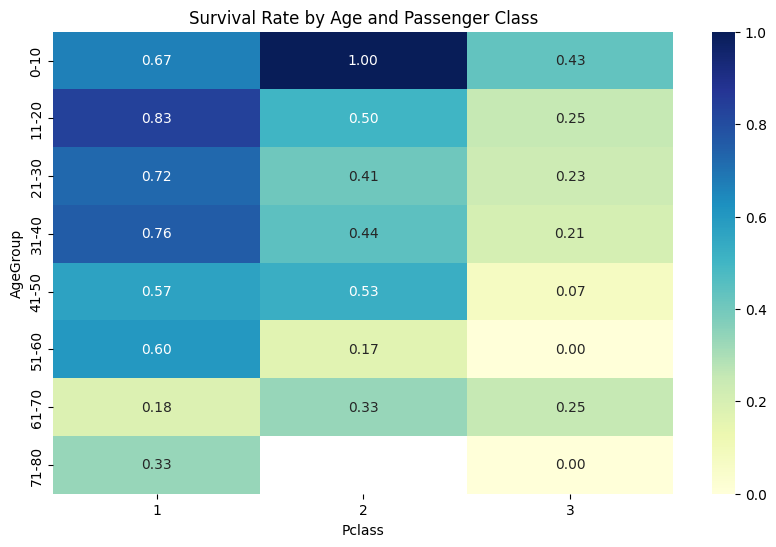

In [15]:
# Activity 4: Visualizing Survival Rate by Age and Passenger Class
# Create a visualization (e.g., a heatmap) showing the survival rate for different age groups (as in Activity 2) and passenger classes.

bins = [0, 11, 21, 31, 41, 51, 61, 71, 81]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
titanic_df['AgeGroup'] = pd.cut(titanic_df['Age'], bins=bins, labels=labels, right=False)

survival_heatmap = titanic_df.pivot_table( values='Survived', index='AgeGroup', columns='Pclass', aggfunc='mean')
plt.figure(figsize=(10, 6))
sns.heatmap(survival_heatmap, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Survival Rate by Age and Passenger Class')
plt.show()

In [19]:
# Activity 5:  Advanced Pivot Table Analysis: Survival Rate, Fare, and Age
# Construct a pivot table that simultaneously presents:
#   - The average survival rate
#   - The median fare
#   - The average age
# Grouped by 'Pclass' and 'Sex'.
# Handle potential missing values in the pivot table.

analysis_table = titanic_df.pivot_table(
    index=['Pclass', 'Sex'],
    values=['Survived', 'Fare', 'Age'],
    aggfunc={'Survived': 'mean','Fare': 'median','Age':'mean'},fill_value='-', margins=True,margins_name='Total').round(2)

analysis_table.columns = ['Survival Rate', 'Median Fare', 'Average Age']

print("Combined Analysis by Class and Gender:")
print(analysis_table)

Combined Analysis by Class and Gender:
               Survival Rate  Median Fare  Average Age
Pclass Sex                                            
1      female          34.61        82.66         0.97
       male            41.28        41.26         0.37
2      female          28.72        22.00         0.92
       male            30.74        13.00         0.16
3      female          21.75        12.48         0.50
       male            26.51         7.92         0.14
Total                  29.70        15.74         0.41
